# Encoding Techniques

- Encoding techniques are used to transform categorical data into numerical values that machine learning algorithms can process.
- Below are the most commonly used encoding methods:



In [1]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display a preview of the dataset
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## 1. Label Encoding
- Assigns a unique integer to each category.
- **Advantages:** Simple to implement.
- **Disadvantages:** Imposes an ordinal relationship, which may not exist.

In [2]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'sex' column
titanic['sex_encoded'] = label_encoder.fit_transform(titanic['sex'])

print(titanic[['sex', 'sex_encoded']].head())


      sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


## 2. One-Hot Encoding
- Converts categories into binary vectors (one column for each category).
- Advantages: Does not impose any ordinal relationship.
- Disadvantages: May lead to a high number of columns in datasets with many categories.

In [5]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
onehot_encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the 'class' column
class_encoded = onehot_encoder.fit_transform(titanic[['class']])

# Convert to DataFrame
class_encoded_df = pd.DataFrame(class_encoded, columns=onehot_encoder.get_feature_names_out(['class']))

# Add the encoded columns to the dataset
titanic = pd.concat([titanic, class_encoded_df], axis=1)

print(titanic[['class'] + list(class_encoded_df.columns)].head())


   class  class_First  class_Second  class_Third
0  Third          0.0           0.0          1.0
1  First          1.0           0.0          0.0
2  Third          0.0           0.0          1.0
3  First          1.0           0.0          0.0
4  Third          0.0           0.0          1.0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 3. Ordinal Encoding
- Similar to label encoding but allows specifying the order of categories.
- Advantages: Preserves order information.
- Disadvantages: Imposes order, which may not exist naturally.

In [ ]:

titanic = sns.load_dataset('titanic')

from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder with a custom category order
ordinal_encoder = OrdinalEncoder(categories=[['Southampton', 'Cherbourg', 'Queenstown']])

# Apply ordinal encoding to the 'embark_town' column
titanic['embark_town_encoded'] = ordinal_encoder.fit_transform(titanic[['embark_town']])

print(titanic[['embark_town', 'embark_town_encoded']].head())


## 4. Binary Encoding
- Converts categories into binary numbers and splits the digits into separate columns.
- Use Case: Reduces dimensionality compared to one-hot encoding.

In [8]:
import category_encoders as ce

df = pd.DataFrame({'Category': ['A', 'B', 'C', 'D']})
encoder = ce.BinaryEncoder(cols=['Category'])
df = encoder.fit_transform(df)
print(df)


   Category_0  Category_1  Category_2
0           0           0           1
1           0           1           0
2           0           1           1
3           1           0           0


## 5. Frequency Encoding
- Encodes categories based on the frequency of their occurrence.
- Use Case: For high cardinality nominal data.

In [9]:
df = pd.DataFrame({'City': ['London', 'Paris', 'Paris', 'Tokyo', 'London']})
freq_encoding = df['City'].value_counts().to_dict()
df['City_encoded'] = df['City'].map(freq_encoding)
print(df)


     City  City_encoded
0  London             2
1   Paris             2
2   Paris             2
3   Tokyo             1
4  London             2


## 6. Target Encoding
- Encodes categories based on the mean of the target variable for each category.
- Use Case: For supervised learning with categorical predictors.

In [10]:
import pandas as pd

df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C'], 'Target': [1, 0, 1, 0]})
mean_target = df.groupby('Category')['Target'].mean().to_dict()
df['Category_encoded'] = df['Category'].map(mean_target)
print(df)


  Category  Target  Category_encoded
0        A       1               1.0
1        B       0               0.0
2        A       1               1.0
3        C       0               0.0


## 7. Hashing Encoding
- Uses a hash function to map categories to numerical values.
- Use Case: For high cardinality data, when reducing memory usage is crucial.

In [18]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
df = pd.DataFrame({'City': ['London ef', 'Paris r', 'Tokyo we', 'Paris we']})

# Convert each entry to a list of strings
input_data = df['City'].apply(lambda x: [x])

# Initialize the FeatureHasher
hasher = FeatureHasher(input_type='string', n_features=4)

# Apply the FeatureHasher
hashed_features = hasher.transform(input_data)

# Convert the hashed features to a dense array for better readability
print(hashed_features.toarray())


[[ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0. -1.  0.  0.]]


## 8. Leave-One-Out Encoding
- Similar to target encoding but excludes the current row while calculating the mean to avoid data leakage.
- Use Case: Supervised learning with categorical features.

In [13]:
import category_encoders as ce

df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C'], 'Target': [1, 0, 1, 0]})
encoder = ce.LeaveOneOutEncoder(cols=['Category'])
df['Category_encoded'] = encoder.fit_transform(df['Category'], df['Target'])
print(df)


  Category  Target  Category_encoded
0        A       1               1.0
1        B       0               0.5
2        A       1               1.0
3        C       0               0.5


## 9. Count Encoding
- Encodes categories based on their count in the dataset.
- Use Case: High cardinality categorical data.

In [15]:
df = pd.DataFrame({'City': ['London', 'Paris', 'Paris', 'Tokyo', 'London']})
count_encoding = df['City'].value_counts().to_dict()
df['City_encoded'] = df['City'].map(count_encoding)
print(df)


     City  City_encoded
0  London             2
1   Paris             2
2   Paris             2
3   Tokyo             1
4  London             2


## 10. Weight of Evidence (WoE) Encoding
- Encodes categories based on their relationship to the target variable using WoE.
- Use Case: Binary classification problems in credit risk modeling.

In [16]:
import category_encoders as ce

df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C'], 'Target': [1, 0, 1, 0]})
encoder = ce.WOEEncoder(cols=['Category'])
df['Category_encoded'] = encoder.fit_transform(df['Category'], df['Target'])
print(df)


  Category  Target  Category_encoded
0        A       1          1.098612
1        B       0          0.000000
2        A       1          1.098612
3        C       0          0.000000


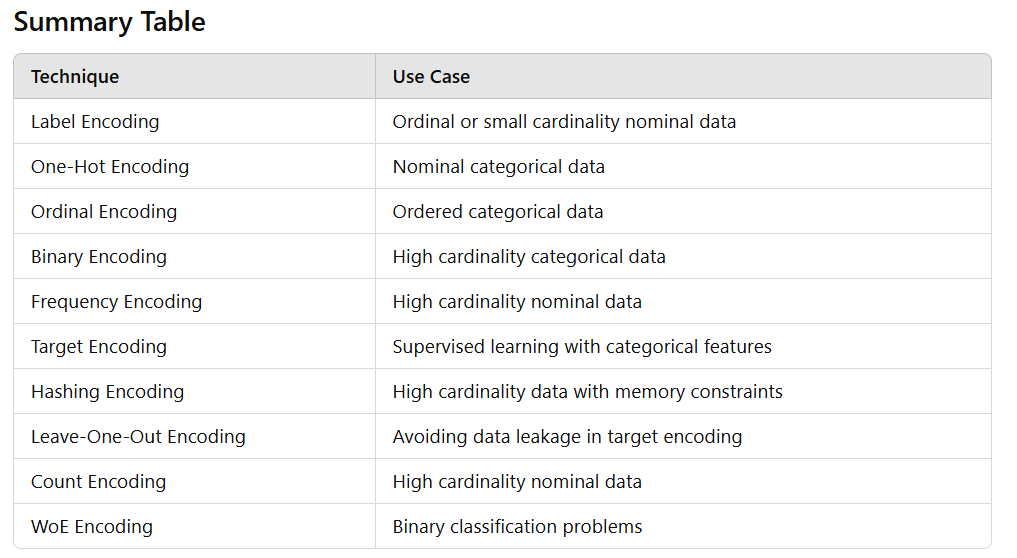

In [19]:
from IPython.display import Image, display

# Path to your local image file
image_path = "D:\images\encoding.png"

# Display the image
display(Image(filename=image_path))